In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Business Understanding

### Background

Our company sold an automotive product for over 20 years. However, for the last 5 years the monthly average profit has been constant and did not gain any significant growth since the number of sales are remain stagnant as well. The condition will remain the same in the future if we do not do something. We have a lot of customer leads that can be a potential buyer. However, with limited member of sales team, we don’t have enough resource to approach more customer. It would be very inefficient and wasting a lotof resource to target all the leads.

We want to be efficient instead of keep expanding the team, so we need another approach. With limited time and resources, we need to be able to quickly inspect and prioritize which customer is a potential buyer. We will also need to formally research on what makes them buy our products. By doing this, we can achieve higher or the same amount of profit with cheaper cost.

**In summary, our business problem is:**
- We have stagnant profit because the number of sales is constant
- There are a lot of customer leads but we can’t reach all of them
- We need to know which customer leads that should be prioritized
- We need lead scoring so that we can be efficent on targeting potential buyer

### Business Goals and KPI
The business goal is determined together with other department. This part should be the continuation of the background problem.
- Gain insight on what drives people to buy our product
- Increase profit by 10% year over year
- Reduce annual marketing cost by 10%


### Data Mining Goals and KPI
The data mining goal is determined by the data mining team and is a translation from the business goals.
- Build predictive model with 75% accuracy
- Build predictive model with 75% recall
- Build predictive model with 75% precision

In [2]:
sales = pd.read_csv(r"C:\Users\Dimas AR\Desktop\Data Science\Algoritma - Sales Prediction\sales.csv")
monthly_sales = pd.read_csv(r"C:\Users\Dimas AR\Desktop\Data Science\Algoritma - Sales Prediction\monthly_sales.csv")
print('Sales Shape:', sales.shape)
print('Monthly Sales Shape: ',monthly_sales.shape)

Sales Shape: (40000, 14)
Monthly Sales Shape:  (90, 3)


# Data Understanding

On the Data Understanding phase, we will gather, describe and explore the data to make sure it fits the business goal.
The deliverable or result of this phase should include:
- Data description
- Early data exploration report
- Data quality report

In [3]:
sales.head()

,flag,gender,education,house_val,age,online,customer_psy,marriage,child,occupation,mortgage,house_owner,region,fam_income
0,Y,M,4. Grad,756460,1_Unk,N,B,NaN,U,Professional,1Low,NaN,Midwest,L
1,N,F,3. Bach,213171,7_>65,N,E,NaN,U,Professional,1Low,Owner,Northeast,G
2,N,M,2. Some College,111147,2_<=25,Y,C,NaN,Y,Professional,1Low,Owner,Midwest,J
3,Y,M,2. Some College,354151,2_<=25,Y,B,Single,U,Sales/Service,1Low,NaN,West,L
4,Y,F,2. Some College,117087,1_Unk,Y,J,Married,Y,Sales/Service,1Low,NaN,South,H


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   flag          40000 non-null  object
 1   gender        40000 non-null  object
 2   education     39259 non-null  object
 3   house_val     40000 non-null  int64 
 4   age           40000 non-null  object
 5   online        40000 non-null  object
 6   customer_psy  40000 non-null  object
 7   marriage      25973 non-null  object
 8   child         40000 non-null  object
 9   occupation    40000 non-null  object
 10  mortgage      40000 non-null  object
 11  house_owner   36623 non-null  object
 12  region        40000 non-null  object
 13  fam_income    40000 non-null  object
dtypes: int64(1), object(13)
memory usage: 4.3+ MB


### Column Description :

The collected data consists of 40,000 distinct customers with 14 variables. The description of each col-
umn/variable can be seen below:

- flag : Whether the customer has bought the target product or not
- gender : Gender of the customer
- education : Education background of customer
- house_val : Value of the residence the customer lives in
- age : Age of the customer by group
- online : Whether the customer had online shopping experience or not
- customer_psy : Variable describing consumer psychology based on the area of residence
- marriage : Marriage status of the customer
- children : Whether the customer has children or not
- occupation : Career information of the customer
- mortgage : Housing Loan Information of customers
- house_own : Whether the customer owns a house or not
- region : Information on the area in which the customer are located
- fam_income : Family income Information of the customer(A means the lowest, and L means the highest)

### Early Data Exploration and Data Quality Check

We also need to check the quality of the data. For example, since many of the column/variable is categorical, we can check the summary of the data and see the number of customer of each categories. By doing this, we can also check whether there are any data that need to be cleansed or to be transformed. For example, we can check if there is a missing/empty values.
The text above each section is the name of the column in the data. The text on the left side is the category
on each column while the number on the right side is the frequency of each category.

In [5]:
for col in sales.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(sales[col].value_counts().head(20))

----------------------------------------flag---------------------------------------- - 

N    20000
Y    20000
Name: flag, dtype: int64

----------------------------------------gender---------------------------------------- - 

M    22019
F    16830
U     1151
Name: gender, dtype: int64

----------------------------------------education---------------------------------------- - 

2. Some College    11400
3. Bach             9267
1. HS               8828
4. Grad             5916
0. <HS              3848
Name: education, dtype: int64

----------------------------------------house_val---------------------------------------- - 

0          7696
1000000      96
1500000      51
2000000      36
294300       29
228900       23
5000         22
261600       22
239800       21
299750       20
163500       20
251790       19
170040       19
245250       19
179850       18
196200       18
272500       18
408750       17
147150       17
343350       17
Name: house_val, dtype: int64

----------------------------------------age---------------------------------------- - 

5_<=55    8103
4_<=45    7115
1_Unk     6709
6_<=65    5907
3_<=35    4984
7_>65     4822
2_<=25    2360
Name: age, dtype: int64

----------------------------------------online---------------------------------------- - 

Y    27319
N    12681
Name: online, dtype: int64

----------------------------------------customer_psy---------------------------------------- - 

B    8197
C    7830
E    6650
F    4058
G    3951
D    2353
I    2262
J    2187
A    1427
H     958
U     127
Name: customer_psy, dtype: int64

----------------------------------------marriage---------------------------------------- - 

Married    20891
Single      5082
Name: marriage, dtype: int64

----------------------------------------child---------------------------------------- - 

Y    18012
N    13333
U     8528
0      127
Name: child, dtype: int64

----------------------------------------occupation---------------------------------------- - 

Professional     14936
Sales/Service    11767
Blue Collar       6621
Retired           4341
Others            2006
Farm               329
Name: occupation, dtype: int64

----------------------------------------mortgage---------------------------------------- - 

1Low     29848
3High     5349
2Med      4803
Name: mortgage, dtype: int64

----------------------------------------house_owner---------------------------------------- - 

Owner     29232
Renter     7391
Name: house_owner, dtype: int64

----------------------------------------region---------------------------------------- - 

South        15676
West          8725
Midwest       8107
Northeast     7247
Rest           245
Name: region, dtype: int64

----------------------------------------fam_income---------------------------------------- - 

E    8432
F    6641
D    4582
G    4224
C    2687
H    2498
A    2274
B    2169
I    1622
L    1617
J    1614
K    1487
U     153
Name: fam_income, dtype: int64

There are some interesting finding from the summary. For example, the gender column consists of 3 categories: F (Female), M (Male), and U (Unknown). The child column is similar, with additional value of U (Unknown) and 0 (zero) even though the column should only be Yes or No. The marriage and education column contain empty values. This is not surprising, since the sales team are not instructed to fulfill each column with pre-determined values. 

However, this means that the **incoming data quality is not good** and require future standardization in the future. This also show us that we need to cleanse and prepare the data before we do any analysis so that all relevant information can be captured.

# Data Preparation

On the Data Understanding phase, we will prepare and cleanse the data so they are fit for analysis and
making prediction. Some people said that the data preparation take 80% of the data mining process.
The deliverable or result of this phase should include:
- Data preparation steps
- Final data for modeling

In [6]:
sales.isnull().sum()

flag                0
gender              0
education         741
house_val           0
age                 0
online              0
customer_psy        0
marriage        14027
child               0
occupation          0
mortgage            0
house_owner      3377
region              0
fam_income          0
dtype: int64

### Data Cleansing Part 1

- Change missing/empty value in education, house_owner and marriage into the most frequent values
- Make all null values in all categorical column into each one of the unique values

In [7]:
sales[['education', 'marriage', 'house_owner']].apply(pd.Series.value_counts)

,education,marriage,house_owner
0. <HS,3848.0,NaN,NaN
1. HS,8828.0,NaN,NaN
2. Some College,11400.0,NaN,NaN
3. Bach,9267.0,NaN,NaN
4. Grad,5916.0,NaN,NaN
Married,NaN,20891.0,NaN
Owner,NaN,NaN,29232.0
Renter,NaN,NaN,7391.0
Single,NaN,5082.0,NaN


In [8]:
sales['education'] = sales['education'].fillna((sales['education'].value_counts().index[0])) 

In [9]:
sales.head()

,flag,gender,education,house_val,age,online,customer_psy,marriage,child,occupation,mortgage,house_owner,region,fam_income
0,Y,M,4. Grad,756460,1_Unk,N,B,NaN,U,Professional,1Low,NaN,Midwest,L
1,N,F,3. Bach,213171,7_>65,N,E,NaN,U,Professional,1Low,Owner,Northeast,G
2,N,M,2. Some College,111147,2_<=25,Y,C,NaN,Y,Professional,1Low,Owner,Midwest,J
3,Y,M,2. Some College,354151,2_<=25,Y,B,Single,U,Sales/Service,1Low,NaN,West,L
4,Y,F,2. Some College,117087,1_Unk,Y,J,Married,Y,Sales/Service,1Low,NaN,South,H


In [10]:
sales.isnull().sum()

flag                0
gender              0
education           0
house_val           0
age                 0
online              0
customer_psy        0
marriage        14027
child               0
occupation          0
mortgage            0
house_owner      3377
region              0
fam_income          0
dtype: int64

In [11]:
#fill null values of marriage column with most frequent value
sales['marriage'] = sales['marriage'].fillna((sales['marriage'].value_counts().index[0])) 

#fill null values of house_owner column with most frequent value
sales['house_owner'] = sales['house_owner'].fillna((sales['house_owner'].value_counts().index[0])) 

In [12]:
sales.isnull().sum()

flag            0
gender          0
education       0
house_val       0
age             0
online          0
customer_psy    0
marriage        0
child           0
occupation      0
mortgage        0
house_owner     0
region          0
fam_income      0
dtype: int64

## Data Cleansing Part 2

- Cleanse the **age** category by removing the index (1_Unkn into Unknown, 2_<=25 into <=25, etc.)
- Cleanse the **mortgage** category by removing the index
- Rename values in **flag**, **gender**, **online**, and **child**

In [13]:
for col in sales.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(sales[col].value_counts().head(20))

----------------------------------------flag---------------------------------------- - 

N    20000
Y    20000
Name: flag, dtype: int64

----------------------------------------gender---------------------------------------- - 

M    22019
F    16830
U     1151
Name: gender, dtype: int64

----------------------------------------education---------------------------------------- - 

2. Some College    12141
3. Bach             9267
1. HS               8828
4. Grad             5916
0. <HS              3848
Name: education, dtype: int64

----------------------------------------house_val---------------------------------------- - 

0          7696
1000000      96
1500000      51
2000000      36
294300       29
228900       23
5000         22
261600       22
239800       21
299750       20
163500       20
251790       19
170040       19
245250       19
179850       18
196200       18
272500       18
408750       17
147150       17
343350       17
Name: house_val, dtype: int64

----------------------------------------age---------------------------------------- - 

5_<=55    8103
4_<=45    7115
1_Unk     6709
6_<=65    5907
3_<=35    4984
7_>65     4822
2_<=25    2360
Name: age, dtype: int64

----------------------------------------online---------------------------------------- - 

Y    27319
N    12681
Name: online, dtype: int64

----------------------------------------customer_psy---------------------------------------- - 

B    8197
C    7830
E    6650
F    4058
G    3951
D    2353
I    2262
J    2187
A    1427
H     958
U     127
Name: customer_psy, dtype: int64

----------------------------------------marriage---------------------------------------- - 

Married    34918
Single      5082
Name: marriage, dtype: int64

----------------------------------------child---------------------------------------- - 

Y    18012
N    13333
U     8528
0      127
Name: child, dtype: int64

----------------------------------------occupation---------------------------------------- - 

Professional     14936
Sales/Service    11767
Blue Collar       6621
Retired           4341
Others            2006
Farm               329
Name: occupation, dtype: int64

----------------------------------------mortgage---------------------------------------- - 

1Low     29848
3High     5349
2Med      4803
Name: mortgage, dtype: int64

----------------------------------------house_owner---------------------------------------- - 

Owner     32609
Renter     7391
Name: house_owner, dtype: int64

----------------------------------------region---------------------------------------- - 

South        15676
West          8725
Midwest       8107
Northeast     7247
Rest           245
Name: region, dtype: int64

----------------------------------------fam_income---------------------------------------- - 

E    8432
F    6641
D    4582
G    4224
C    2687
H    2498
A    2274
B    2169
I    1622
L    1617
J    1614
K    1487
U     153
Name: fam_income, dtype: int64

### Typo Fixing for age, education and mortgage

In [14]:
#Age Column Typo Fixing
sales['age'] = sales['age'].replace(['2_<=25'], '<=25')
sales['age'] = sales['age'].replace(['7_>65'], '>65')
sales['age'] = sales['age'].replace(['3_<=35'], '26-35')
sales['age'] = sales['age'].replace(['4_<=45'], '36-45')
sales['age'] = sales['age'].replace(['5_<=55'], '46-55')
sales['age'] = sales['age'].replace(['6_<=65'], '56-65')
sales['age'] = sales['age'].replace(['1_Unk'], 'Unknown')

#education column typo fixing
sales['education'] = sales['education'].replace(['0. <HS'], '<HS')
sales['education'] = sales['education'].replace(['1. HS'], 'HS')
sales['education'] = sales['education'].replace(['2. Some College'], 'Some College')
sales['education'] = sales['education'].replace(['3. Bach'], 'Bach')
sales['education'] = sales['education'].replace(['4. Grad'], 'Grad')

#Mortgage Column Typo Fixing
sales['mortgage'] = sales['mortgage'].replace(['1Low'], 'Low')
sales['mortgage'] = sales['mortgage'].replace(['2Med'], 'Med')
sales['mortgage'] = sales['mortgage'].replace(['3High'], 'High')


### Typo Fixing for flag, gender, and online

In [15]:
#flag Column Typo Fixing
sales['flag'] = sales['flag'].replace(['N'], 'No')
sales['flag'] = sales['flag'].replace(['Y'], 'Yes')

#gender Column Typo Fixing
sales['gender'] = sales['gender'].replace(['M'], 'Male')
sales['gender'] = sales['gender'].replace(['F'], 'Female')
sales['gender'] = sales['gender'].replace(['U'], 'Unknown')

#online Column Typo Fixing
sales['online'] = sales['online'].replace(['N'], 'No')
sales['online'] = sales['online'].replace(['Y'], 'Yes')

### Changing index in child column

In [16]:
for index in sales.index:
    if sales.loc[index, 'child'] == 'Y':
        sales.loc[index, 'child'] = 'Yes'
    elif sales.loc[index, 'child'] == 'N':
        sales.loc[index, 'child'] = 'No'
    else:
        sales.loc[index, 'child'] = 'Unknown'

In [17]:
for col in sales.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(sales[col].value_counts().head(20))

----------------------------------------flag---------------------------------------- - 

No     20000
Yes    20000
Name: flag, dtype: int64

----------------------------------------gender---------------------------------------- - 

Male       22019
Female     16830
Unknown     1151
Name: gender, dtype: int64

----------------------------------------education---------------------------------------- - 

Some College    12141
Bach             9267
HS               8828
Grad             5916
<HS              3848
Name: education, dtype: int64

----------------------------------------house_val---------------------------------------- - 

0          7696
1000000      96
1500000      51
2000000      36
294300       29
228900       23
5000         22
261600       22
239800       21
299750       20
163500       20
251790       19
170040       19
245250       19
179850       18
196200       18
272500       18
408750       17
147150       17
343350       17
Name: house_val, dtype: int64

----------------------------------------age---------------------------------------- - 

46-55      8103
36-45      7115
Unknown    6709
56-65      5907
26-35      4984
>65        4822
<=25       2360
Name: age, dtype: int64

----------------------------------------online---------------------------------------- - 

Yes    27319
No     12681
Name: online, dtype: int64

----------------------------------------customer_psy---------------------------------------- - 

B    8197
C    7830
E    6650
F    4058
G    3951
D    2353
I    2262
J    2187
A    1427
H     958
U     127
Name: customer_psy, dtype: int64

----------------------------------------marriage---------------------------------------- - 

Married    34918
Single      5082
Name: marriage, dtype: int64

----------------------------------------child---------------------------------------- - 

Yes        18012
No         13333
Unknown     8655
Name: child, dtype: int64

----------------------------------------occupation---------------------------------------- - 

Professional     14936
Sales/Service    11767
Blue Collar       6621
Retired           4341
Others            2006
Farm               329
Name: occupation, dtype: int64

----------------------------------------mortgage---------------------------------------- - 

Low     29848
High     5349
Med      4803
Name: mortgage, dtype: int64

----------------------------------------house_owner---------------------------------------- - 

Owner     32609
Renter     7391
Name: house_owner, dtype: int64

----------------------------------------region---------------------------------------- - 

South        15676
West          8725
Midwest       8107
Northeast     7247
Rest           245
Name: region, dtype: int64

----------------------------------------fam_income---------------------------------------- - 

E    8432
F    6641
D    4582
G    4224
C    2687
H    2498
A    2274
B    2169
I    1622
L    1617
J    1614
K    1487
U     153
Name: fam_income, dtype: int64

Now that the data is already cleansed, we need to consider whether we need to remove data that contain any
Unknown value? Should the sales team need to know all information about a customer to make a prediction
or are they allowed to fill some variable with Unknown? In this step we need to discuss with the sales team
since they are the final user of the model.

Let’s say together with the sales team we have decided that any data that contain missing value should not
be used for analysis Therefore, we will drop/remove any row/customer that has missing information about
them.

Finally, after careful and rigorous data cleansing, we acquire our final data that will be used for analysis and
modeling.

In [18]:
sales.head()

,flag,gender,education,house_val,age,online,customer_psy,marriage,child,occupation,mortgage,house_owner,region,fam_income
0,Yes,Male,Grad,756460,Unknown,No,B,Married,Unknown,Professional,Low,Owner,Midwest,L
1,No,Female,Bach,213171,>65,No,E,Married,Unknown,Professional,Low,Owner,Northeast,G
2,No,Male,Some College,111147,<=25,Yes,C,Married,Yes,Professional,Low,Owner,Midwest,J
3,Yes,Male,Some College,354151,<=25,Yes,B,Single,Unknown,Sales/Service,Low,Owner,West,L
4,Yes,Female,Some College,117087,Unknown,Yes,J,Married,Yes,Sales/Service,Low,Owner,South,H


**Removing unknown values**

In [19]:
sales = sales[sales['child'] != "Unknown"]

In [20]:
sales.head()

,flag,gender,education,house_val,age,online,customer_psy,marriage,child,occupation,mortgage,house_owner,region,fam_income
2,No,Male,Some College,111147,<=25,Yes,C,Married,Yes,Professional,Low,Owner,Midwest,J
4,Yes,Female,Some College,117087,Unknown,Yes,J,Married,Yes,Sales/Service,Low,Owner,South,H
5,Yes,Female,Bach,248694,56-65,Yes,B,Married,No,Professional,Med,Owner,West,G
7,No,Female,Bach,416925,46-55,Yes,C,Married,Yes,Professional,Low,Owner,South,I
8,No,Female,HS,207676,36-45,Yes,G,Married,Yes,Blue Collar,Low,Renter,West,D


In [21]:
sales = sales[sales['age'] != "Unknown"]

In [22]:
sales = sales[sales['child'] != "Unknown"]

In [23]:
sales.head()

,flag,gender,education,house_val,age,online,customer_psy,marriage,child,occupation,mortgage,house_owner,region,fam_income
2,No,Male,Some College,111147,<=25,Yes,C,Married,Yes,Professional,Low,Owner,Midwest,J
5,Yes,Female,Bach,248694,56-65,Yes,B,Married,No,Professional,Med,Owner,West,G
7,No,Female,Bach,416925,46-55,Yes,C,Married,Yes,Professional,Low,Owner,South,I
8,No,Female,HS,207676,36-45,Yes,G,Married,Yes,Blue Collar,Low,Renter,West,D
10,No,Male,Some College,158268,>65,Yes,C,Married,Yes,Sales/Service,Med,Owner,Midwest,E


As expected, CRISP-DM is not a linear process. We can go back and forth between process to make sure
it fits the business and data mining goal. Here, we go back to data understanding phase to further explore
and analyze the data before we start to make a machine learning model.

# Exploratory Data Analysis (EDA)

**House Valuation Distribution**

Here we will do visualization to see whether there are any difference between customer who buy our product
and who don’t. To visualize a distribution, we can use histogram. The x-axis is the house valuation while
the y-axis show the frequency or the number of customer with certain house valuation.

From the histogram, most of our customer has house valuation less than 2,500,000. Some customers are
outlier and has house valuation greater than 2,500,000. Their frequency is low and they cannot be seen
on the histogram. The distribution for people who buy and not buy are quite similar, therefore we cannot
simply decide if a customer will buy our product based on their house valuation.

C:\Users\Dimas AR\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'House Valuation Distribution')

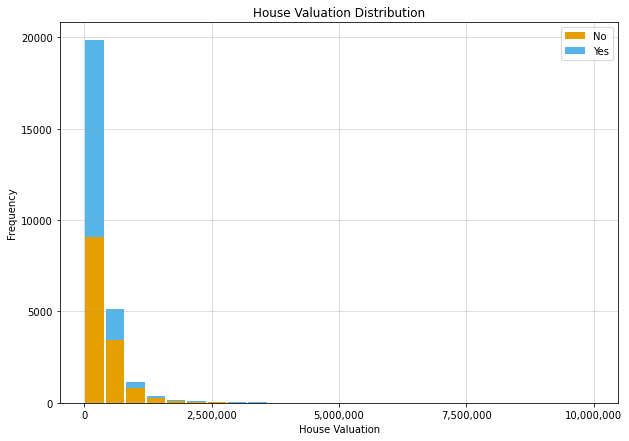

In [24]:
import matplotlib.ticker as mtick
#Separate list for each flag
yes = list(sales[sales['flag'] == 'Yes']['house_val'])
no = list(sales[sales['flag'] == 'No']['house_val'])

# Assign colors for each flag and set as names
colors = ['#E69F00', '#56B4E9']
Flag = ['No', 'Yes']

# Make the histogram using a list of lists
# we dont use normalize first
f, ax = plt.subplots(figsize=(10,7))
plt.hist([yes, no], bins=25, stacked=True,range=(0,10000000), rwidth=0.9, color = colors, label=Flag)
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
plt.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.4)

# Plot formatting
plt.legend()
plt.xlabel('House Valuation')
plt.ylabel('Frequency')
plt.title('House Valuation Distribution')

We can cut and remove the outlier to see the distribution better.

Text(0.5, 1.0, 'House Valuation Distribution')

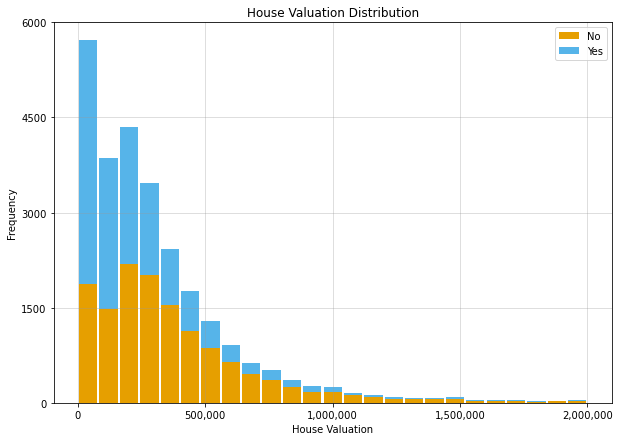

In [25]:
import matplotlib.ticker as mtick
#Separate list for each flag
yes = list(sales[sales['flag'] == 'Yes']['house_val'])
no = list(sales[sales['flag'] == 'No']['house_val'])

# Assign colors for each flag and set as names
colors = ['#E69F00', '#56B4E9']
Flag = ['No', 'Yes']

# Make the histogram using a list of lists
# we dont use normalize first
f, ax = plt.subplots(figsize=(10,7))
plt.hist([yes, no], bins=25, stacked=True,range=(0,2000000), rwidth=0.9, color = colors, label=Flag)
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
plt.grid(b=True, which='major', color='#999999', linestyle='-', alpha=0.4)

# Plot formatting
plt.legend()
plt.xlabel('House Valuation')
plt.ylabel('Frequency')
plt.title('House Valuation Distribution')

**Education Level**

We will see if the education level can be a great indicator to decide if a customer has high probability to
buy our product. The color of each block represent the frequency of people that fell in that category, with
brighter color indicate higher frequency.

Based on the heatmap, people with higher education level (Bach and Grad) are more likely to buy our
product. Therefore, education level may be a great indicator to check potential customer.

In [26]:
sales.duplicated().sum()

107

In [27]:
sales.drop_duplicates(keep=False).shape

(26668, 14)

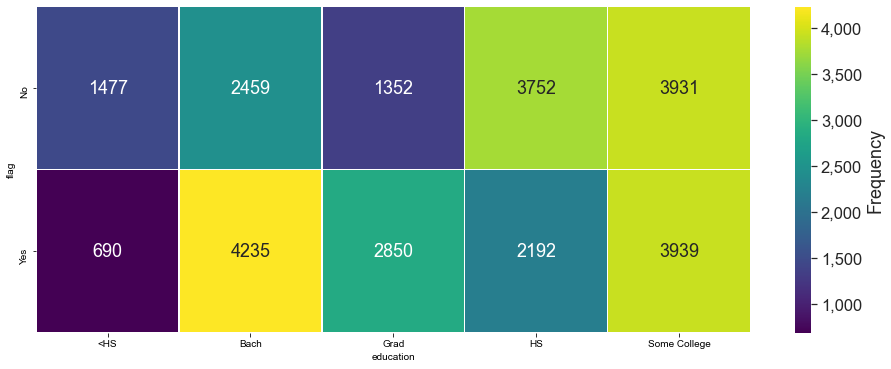

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

edu_level = sales.reset_index().pivot_table(index="flag", columns = "education", values = "house_val", aggfunc="count")
f, ax = plt.subplots(figsize=(16, 6))
comma_fmt = FuncFormatter(lambda x, p: format(int(x), ','))
sns.set(font_scale=1.5)
sns.heatmap(edu_level, annot=True,  linewidths=.5,fmt='g',cmap="viridis",cbar_kws={'label': 'Frequency','format':comma_fmt}, ax=ax)

plt.show()

**Occupation**

We will do the same thing here with the occupation/job. The one that stands out is the professional
occupation that has a very high frequency of people who buy our product.

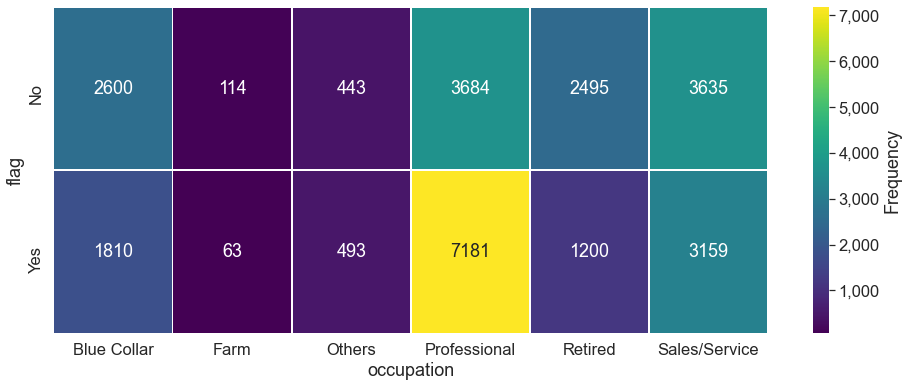

In [29]:
occ_level = sales.reset_index().pivot_table(index="flag", columns = "occupation", values = "house_val", aggfunc="count")
f, ax = plt.subplots(figsize=(16, 6))
comma_fmt = FuncFormatter(lambda x, p: format(int(x), ','))
sns.set(font_scale=1.5)
sns.heatmap(occ_level, annot=True,  linewidths=.5,fmt='g',cmap="viridis",cbar_kws={'label': 'Frequency','format':comma_fmt}, ax=ax)

plt.show()

## Modelling

On the Modeling phase, we will start creating model to find pattern inside our data and to make future
prediction for business purpose.

The deliverable or result of this phase should include:

- Modeling Technique and assumption
- Model Description
- Model Evaluation

Before we begin apply a Machine Learning model to the data, we need to **transform the data** into a proper format

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
sales.flag= le.fit_transform(sales.flag.values)
sales.online= le.fit_transform(sales.online.values)

In [31]:
sales.dtypes

flag             int32
gender          object
education       object
house_val        int64
age             object
online           int32
customer_psy    object
marriage        object
child           object
occupation      object
mortgage        object
house_owner     object
region          object
fam_income      object
dtype: object

In [32]:
sales.head()

,flag,gender,education,house_val,age,online,customer_psy,marriage,child,occupation,mortgage,house_owner,region,fam_income
2,0,Male,Some College,111147,<=25,1,C,Married,Yes,Professional,Low,Owner,Midwest,J
5,1,Female,Bach,248694,56-65,1,B,Married,No,Professional,Med,Owner,West,G
7,0,Female,Bach,416925,46-55,1,C,Married,Yes,Professional,Low,Owner,South,I
8,0,Female,HS,207676,36-45,1,G,Married,Yes,Blue Collar,Low,Renter,West,D
10,0,Male,Some College,158268,>65,1,C,Married,Yes,Sales/Service,Med,Owner,Midwest,E


From the categorical features I'm going to transform the columns education, age, mortgage and fam_income using label encoding because they have a hierarchy. For the other categories I'll treat them as dummy variables

In [33]:
sales.education= le.fit_transform(sales.education.values)
sales.age= le.fit_transform(sales.age.values)
sales.mortgage= le.fit_transform(sales.mortgage.values)
sales.fam_income= le.fit_transform(sales.fam_income.values)

In [34]:
sales.dtypes

flag             int32
gender          object
education        int32
house_val        int64
age              int32
online           int32
customer_psy    object
marriage        object
child           object
occupation      object
mortgage         int32
house_owner     object
region          object
fam_income       int32
dtype: object

Here we will transform the remaining object using dummy variables

In [35]:
dummy_features = ['gender', 'customer_psy', 'occupation', 'child', 'house_owner', 'region', 'marriage']
for cat in dummy_features:
    print(cat, sales[cat].unique())

gender ['Male' 'Female' 'Unknown']
customer_psy ['C' 'B' 'G' 'I' 'F' 'E' 'J' 'D' 'A' 'H']
occupation ['Professional' 'Blue Collar' 'Sales/Service' 'Others' 'Retired' 'Farm']
child ['Yes' 'No']
house_owner ['Owner' 'Renter']
region ['Midwest' 'West' 'South' 'Northeast' 'Rest']
marriage ['Married' 'Single']


In [36]:
def apply_dummy(sales, cat, drop_first=True):
    return pd.concat([sales, pd.get_dummies(sales[cat], prefix=cat, drop_first=drop_first)], axis=1).drop(cat, axis=1)

In [37]:
for cat in dummy_features:
    sales = apply_dummy(sales, cat)

In [38]:
sales.head()

,flag,education,house_val,age,online,mortgage,fam_income,gender_Male,gender_Unknown,customer_psy_B,...,occupation_Professional,occupation_Retired,occupation_Sales/Service,child_Yes,house_owner_Renter,region_Northeast,region_Rest,region_South,region_West,marriage_Single
2,0,4,111147,4,1,1,9,1,0,0,...,1,0,0,1,0,0,0,0,0,0
5,1,1,248694,3,1,2,6,0,0,1,...,1,0,0,0,0,0,0,0,1,0
7,0,1,416925,2,1,1,8,0,0,0,...,1,0,0,1,0,0,0,1,0,0
8,0,3,207676,1,1,1,3,0,0,0,...,0,0,0,1,1,0,0,0,1,0
10,0,4,158268,5,1,2,4,1,0,0,...,0,0,1,1,0,0,0,0,0,0


As we could see, there is several columns that turned into Int32 instead of Int64 after transforming. So before we move into the split and modelling phase, we should transform the Int32 into Int64

In [39]:
sales = sales.astype({col: 'int64' for col in sales.select_dtypes('int32').columns})

In [40]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26877 entries, 2 to 39999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   flag                      26877 non-null  int64
 1   education                 26877 non-null  int64
 2   house_val                 26877 non-null  int64
 3   age                       26877 non-null  int64
 4   online                    26877 non-null  int64
 5   mortgage                  26877 non-null  int64
 6   fam_income                26877 non-null  int64
 7   gender_Male               26877 non-null  uint8
 8   gender_Unknown            26877 non-null  uint8
 9   customer_psy_B            26877 non-null  uint8
 10  customer_psy_C            26877 non-null  uint8
 11  customer_psy_D            26877 non-null  uint8
 12  customer_psy_E            26877 non-null  uint8
 13  customer_psy_F            26877 non-null  uint8
 14  customer_psy_G            26877 non-nu

### I. Cross Validation

The cross-validation step is where we will split our data into 2 separate dataset: training dataset and testing
dataset.

- Training Dataset: Dataset that will be used to train the machine learning model
- Testing Dataset: Dataset that will be used to evaluate the performance of the model.

Why do we need to separate the data? Because the model will always perform better in the data that
they’ve trained with. Imagine where you are doing a math homework. You can easily do them, especially
after you check the correct answer and learn what makes you wrong. However, we want our model to be
able to predict a new, unseen data. That’s why we need the testing dataset. The testing dataset acts as the
examination or evaluation for the model, to check whether they can truly learn the pattern inside the data.

In [41]:
sales.columns

Index(['flag', 'education', 'house_val', 'age', 'online', 'mortgage',
       'fam_income', 'gender_Male', 'gender_Unknown', 'customer_psy_B',
       'customer_psy_C', 'customer_psy_D', 'customer_psy_E', 'customer_psy_F',
       'customer_psy_G', 'customer_psy_H', 'customer_psy_I', 'customer_psy_J',
       'occupation_Farm', 'occupation_Others', 'occupation_Professional',
       'occupation_Retired', 'occupation_Sales/Service', 'child_Yes',
       'house_owner_Renter', 'region_Northeast', 'region_Rest', 'region_South',
       'region_West', 'marriage_Single'],
      dtype='object')

In [42]:
X = sales[['education', 'house_val', 'age', 'online', 'mortgage',
       'fam_income', 'gender_Male', 'gender_Unknown', 'customer_psy_B',
       'customer_psy_C', 'customer_psy_D', 'customer_psy_E', 'customer_psy_F',
       'customer_psy_G', 'customer_psy_H', 'customer_psy_I', 'customer_psy_J',
       'occupation_Farm', 'occupation_Others', 'occupation_Professional',
       'occupation_Retired', 'occupation_Sales/Service', 'child_Yes',
       'house_owner_Renter', 'region_Northeast', 'region_Rest', 'region_South',
       'region_West', 'marriage_Single']]

y = sales[['flag']]

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train Shape:', X_train.shape)
print('y_train Shape: ',y_train.shape)
print('X_test:', X_test.shape)
print('y_test Shape: ',y_test.shape)

X_train Shape: (21501, 29)
y_train Shape:  (21501, 1)
X_test: (5376, 29)
y_test Shape:  (5376, 1)


Here we split the data with **80% of the data** will be the training dataset and the rest will be the testing
dataset. Each observation/row is randomly selected as either the training set or the testing set. The random
selection is done to make sure we don’t include any selection bias done by human.

### II. Model Fitting

Here, we fit or train the model using the data train. We will use 3 different models: **Decision Tree, 
Random Forest, and LGBM**. I also include the **SVM** model for additional. Later, we will evaluate both models and compare the outcome. eventually we will choose only the best model based on the final score

### Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #for checking the model accuracy

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred1=dt.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(pred1,y_test))

The accuracy of the Decision Tree is 0.6002604166666666


In [45]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, dt.predict(X_test))
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test, dt.predict(X_test)))

Confusion matrix: 
 [[1534 1066]
 [1083 1693]]
Classification report: 
               precision    recall  f1-score   support

           0       0.59      0.59      0.59      2600
           1       0.61      0.61      0.61      2776

    accuracy                           0.60      5376
   macro avg       0.60      0.60      0.60      5376
weighted avg       0.60      0.60      0.60      5376



### Support Vector Machine

In [46]:
#from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
#from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm

model = svm.SVC() #select the algorithm
model.fit(X_train, y_train) # we train the algorithm with the training data and the training output
pred2=model.predict(X_test) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(pred2,y_test))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

C:\Users\Dimas AR\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


The accuracy of the SVM is: 0.6311383928571429


### Random Forest Classification + Randomized Search CV

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

params = {'n_estimators': range(50, 251, 50),
          'max_depth': range(3, 25),
          'max_features': ['sqrt', 'log2', None]}

rscv = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=params,
                          n_iter=20,
                          cv=3,
                          verbose=-1,
                          n_jobs=8)

rf = make_pipeline(rscv)

In [48]:
rf.fit(X_train, y_train);

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  60 out of  60 | elapsed:  3.0min finished
C:\Users\Dimas AR\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [49]:
rf_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, rf.predict(X_test))
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test, rf.predict(X_test)))
print('The accuracy of the Random Forest is',metrics.accuracy_score(y_test, rf.predict(X_test)))

Confusion matrix: 
 [[1718  882]
 [ 797 1979]]
Classification report: 
               precision    recall  f1-score   support

           0       0.68      0.66      0.67      2600
           1       0.69      0.71      0.70      2776

    accuracy                           0.69      5376
   macro avg       0.69      0.69      0.69      5376
weighted avg       0.69      0.69      0.69      5376

The accuracy of the Random Forest is 0.6876860119047619


In [50]:
#cm = confusion_matrix(y_test, model.predict(X_test))
#print('Confusion matrix: \n',cm)
#print('Classification report: \n',classification_report(y_test, model.predict(X_test)))
#print('The accuracy of the Random Forest is',metrics.accuracy_score(y_test, model.predict(X_test)))

### LightGBM Classification

In [51]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

clf_lgbm = LGBMClassifier(
        n_estimators=300,
        num_leaves=15,
        colsample_bytree=.8,
        subsample=.8,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01
    )

clf_lgbm.fit(X_train, 
        y_train,
        eval_set= [(X_train, y_train), (X_test, y_test)], 
        eval_metric='auc', 
        verbose=0, 
        early_stopping_rounds=30
       )

acc_clf_lgbm = round(clf_lgbm.score(X_test, y_test) * 100, 2)
acc_clf_lgbm

C:\Users\Dimas AR\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


69.59

In [52]:
y_pred = clf_lgbm.predict(X_test)
confusion_matrix(y_test, y_pred)
print('Classification report: \n',classification_report(y_test, clf_lgbm.predict(X_test)))
print('The accuracy of the LGBM is',metrics.accuracy_score(y_test, clf_lgbm.predict(X_test)))

Classification report: 
               precision    recall  f1-score   support

           0       0.70      0.65      0.67      2600
           1       0.69      0.74      0.71      2776

    accuracy                           0.70      5376
   macro avg       0.70      0.69      0.69      5376
weighted avg       0.70      0.70      0.70      5376

The accuracy of the LGBM is 0.6958705357142857


### Feature Importance

In [53]:
feature_scores = pd.Series(clf_lgbm.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

house_val                   258
age                         160
education                   129
fam_income                  112
gender_Male                  82
mortgage                     58
online                       53
region_South                 40
customer_psy_C               37
marriage_Single              36
child_Yes                    33
occupation_Professional      30
customer_psy_E               28
house_owner_Renter           26
occupation_Others            19
customer_psy_D               17
gender_Unknown               16
customer_psy_G               14
occupation_Retired           13
occupation_Sales/Service     13
region_Northeast             13
region_West                  12
occupation_Farm              12
region_Rest                  11
customer_psy_F               10
customer_psy_H               10
customer_psy_J                7
customer_psy_B                6
customer_psy_I                5
dtype: int32

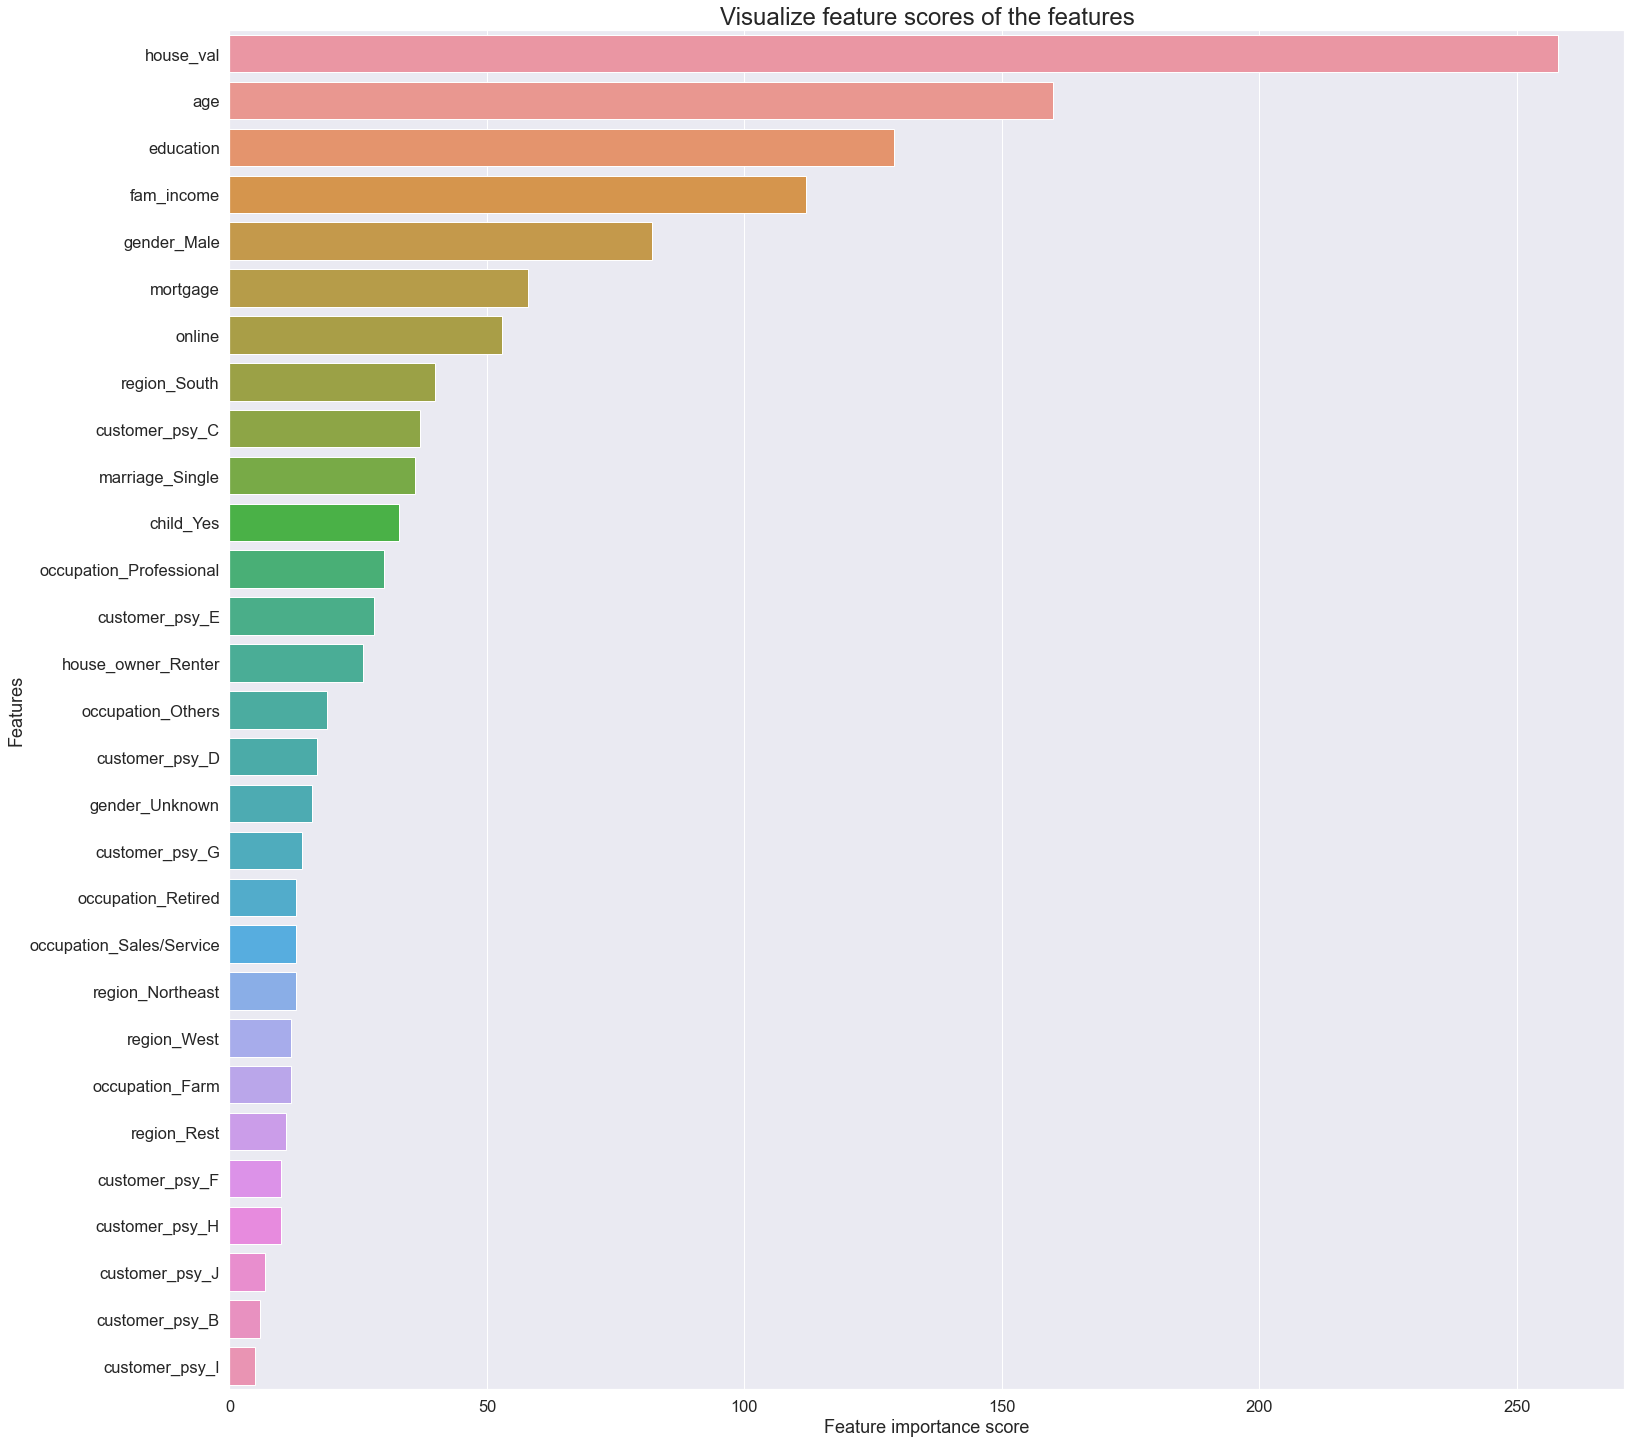

In [54]:
f, ax = plt.subplots(figsize=(25,25))
sns.set(font_scale=2)
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

With that, we can go back to the business goal, specifically the Data Mining Goals of our project. Does
our model have achieved our data mining goals?

- Build predictive model with 75% accuracy
- Build predictive model with 75% recall
- Build predictive model with 75% precision

If the model doesn’t satisfy the data mining goals, the team can works on improving the model to get
better performance. That’s why we have an improvement loop on the machine learning workflow. We rarely
achieve our best model on the first run and need to do several iterations on improvement until we find the
best model.

For now, we will proceed to the next step.

## Evaluation

On the **Evaluation phase**, we will further evaluate the model into the context of the business problem.
The deliverable or result of this phase should include:
- Model business assesment
- Review of the overal process
- Possible action and final decision

### Cost and Benefit Analysis

The cost and benefit analysis is where we try to convert the machine learning performance into the business
context. We will try to see by employing the machine model, how many profit that we can make compared
to the average profit we currently have?

**Define Cost and Benefit**

The first we do is to define the cost and benefit of each decision. We will define it similar with the previous
confusion matrix. The main cost is the cost of approaching a customer, in here we defined it as 600. The
revenue generated for each customer is 1000, with the profit of 400 after we cut the revenue with the cost.
- **True Positive (TP)**: If the model predict customer **will buy** and the prediction is correct **(customer actually buy)**, we will get a profit of 400 (1000 revenue - 600 cost)

- **False Positive (FP)**: If the model predict customer **will buy** and the prediction is incorrect **(customer not buy)**, we will lost 600

- **True Negative (TN)**: If the model predict customer **will not buy** and the prediction is correct **(customer not buy)**, nothing happened

- **False Negative (FN)**: If the model predict customer **will not buy** and the prediction is incorrect **(customer buy)**, nothing happened

In [55]:
output = pd.DataFrame({'Decision Tree': pred1,'Random Forest': rf_pred, 'LGBM' : y_pred, 'Truth': y_test['flag']})
output.to_csv('predicted_sales.csv', index=False)

In [56]:
output.sort_values(by = ['Decision Tree','Random Forest','LGBM'], ascending=[False,False,False]).head(10)

,Decision Tree,Random Forest,LGBM,Truth
7170,1,1,1,0
14459,1,1,1,1
39430,1,1,1,0
25024,1,1,1,0
30921,1,1,1,0
19446,1,1,1,1
37010,1,1,1,0
25077,1,1,1,0
25849,1,1,1,1
24268,1,1,1,1


We will prioritize the customer that has the highest probability to buy our product. Thus, first we make a
list of a high scoring customer.

And we calculate for how many profit we will get if we target and approach only some percent of the total
customer? For example, if we only target the top 10 customer and ignore the rest, we have correctly predict
6 customer as buy and only a single incorrect prediction (the actual buying decision is on the truth column).
Thus, our profit would be:

#### <center> Profit = 6 × 400 + 2 × (−600) = 1200 (LGBM Model)
#### <center> Profit = 6 × 400 + 2 × (−600) = 1200 (Random Forest Model)
#### <center> Profit = 6 × 400 + 2 × (−600) = 1200 (Decision Tree Model)

Since we have 0 cost and 0 benefit for negative prediction, we can skip the calculation and our **final profit is
only a mere 1200**.

Now we increase the number of people that we will approach by using the top 20 leads based on their score.

In [57]:
output.sort_values(by = ['Decision Tree','Random Forest','LGBM'], ascending=[False,False,False]).head(20)

,Decision Tree,Random Forest,LGBM,Truth
7170,1,1,1,0
14459,1,1,1,1
39430,1,1,1,0
25024,1,1,1,0
30921,1,1,1,0
19446,1,1,1,1
37010,1,1,1,0
25077,1,1,1,0
25849,1,1,1,1
24268,1,1,1,1


From the top 20 leads, we get 11 correct prediction of buying and 9 incorrect prediction. Therefore, we will
get a total profit of:

#### <center> Profit = 11 × 400 + 2 × (−600) = 3200

<center> That’s how we will calculate the profit.

### Review Overal Process

The overal process of the data mining is quite smooth with some flaws that we find:
- Dirty or improper input data
- Underperforming model
- Data gathering is not done in real time yet


### Final Decision

After reviewing the project, there are some possible action for us to do:
- Improve the model before release them into the real use
- Release the model while also developing a better model
- Create a standardized data input procedure
- Present a full report of the data mining project